In [1]:
# Types of Decision trees
# 1) ID3 ( Iterative Dichotomiser 3)
# 2) C4.5 (sucessor of ID3)
# 3) C5.0 
# 4) M5
# 5) Decision Stump
# 6) MARS
# 7) CART (Classification And Regression Tree)
# 8) Conditional Inference Trees

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('capitalbikeshare.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115597 entries, 0 to 115596
Data columns (total 9 columns):
Duration                115597 non-null int64
Start date              115597 non-null object
End date                115597 non-null object
Start station number    115597 non-null int64
Start station           115597 non-null object
End station number      115597 non-null int64
End station             115597 non-null object
Bike number             115597 non-null object
Member type             115597 non-null object
dtypes: int64(3), object(6)
memory usage: 7.9+ MB


# Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115597 entries, 0 to 115596
Data columns (total 9 columns):
Duration                115597 non-null int64
Start date              115597 non-null object
End date                115597 non-null object
Start station number    115597 non-null int64
Start station           115597 non-null object
End station number      115597 non-null int64
End station             115597 non-null object
Bike number             115597 non-null object
Member type             115597 non-null object
dtypes: int64(3), object(6)
memory usage: 7.9+ MB


In [4]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,9/20/2010 11:27,9/20/2010 11:43,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,9/20/2010 11:41,9/20/2010 11:42,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,9/20/2010 12:05,9/20/2010 12:50,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,9/20/2010 12:06,9/20/2010 12:29,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,9/20/2010 12:10,9/20/2010 12:34,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [7]:
df.describe()

,Duration,Start station number,End station number
count,115597.000000,115597.000000,115597.000000
mean,1254.649956,31266.213431,31268.042250
std,2914.317998,187.645048,186.194316
min,60.000000,31000.000000,31000.000000
25%,403.000000,31110.000000,31111.000000
50%,665.000000,31213.000000,31214.000000
75%,1120.000000,31301.000000,31238.000000
max,85644.000000,31805.000000,31805.000000


In [18]:
df['Member type'].value_counts()

Member     91586
Casual     24001
Unknown       10
Name: Member type, dtype: int64

# Graphs

In [8]:
x = df[['Duration' , 'Start station number' , 'End station number']]
y = df['Member type']

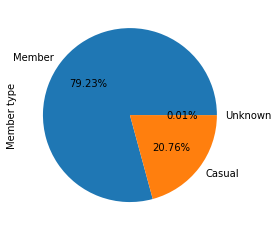

In [27]:
y.value_counts().plot(kind='pie' , autopct='%1.2f%%')
plt.show()

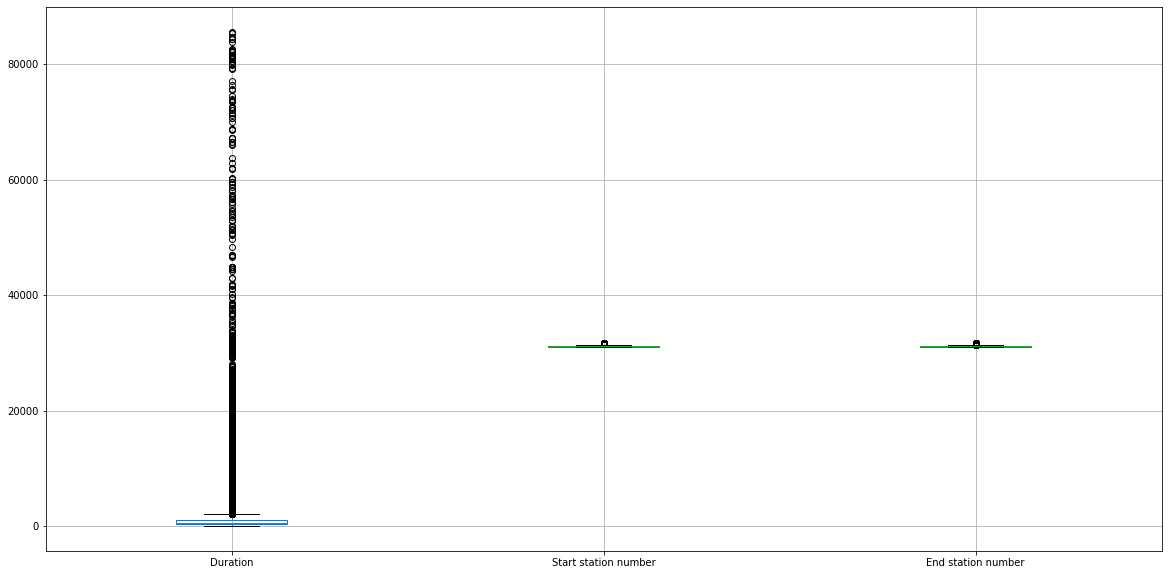

In [26]:
plt.figure(figsize=(20,10))
x.boxplot()
plt.show()

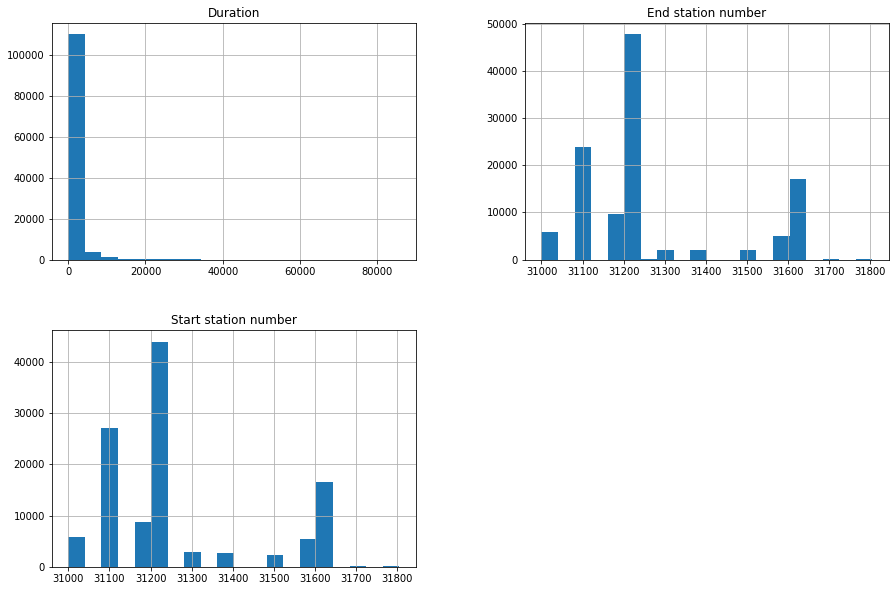

In [33]:
df.hist(bins=20,figsize=(15,10))
plt.show()

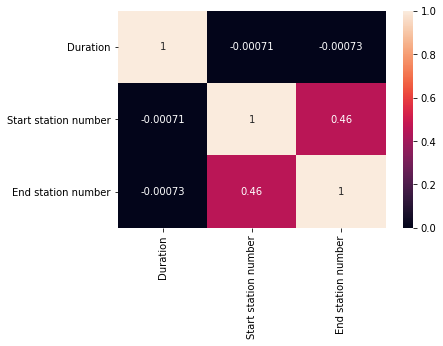

In [35]:
corr = df[df.columns].corr()
sns.heatmap(corr,annot=True)

# Split data

In [30]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2 , random_state=0)

# Decision Tree

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [39]:
accuracy2 = accuracy_score(Y_test , model.predict(X_test))* 100
accuracy2

80.18598615916956

In [42]:
cm = confusion_matrix(Y_test , model.predict(X_test))
print(cm)

[[ 2667  2207     0]
 [ 2370 15872     4]
 [    0     0     0]]


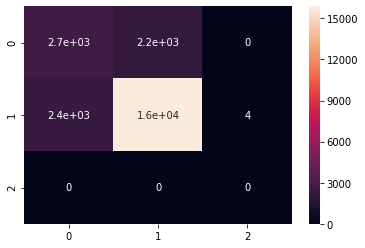

In [43]:
sns.heatmap(cm,annot=True)